In [4]:
import matplotlib.pyplot as plt
from scripts.datagen.create_dataset import create_dataset
from scripts.utils.params import *
from scripts.utils.utils import *
from scripts.particle.rungekutta import * 

## Generate Dataset for Fitzhug Nagumo model

In [7]:

# s_params = SolverParams(final_time=500, time_step=0.5, u0=[0.0, 0.0])
s_params = SolverParams.get_from_file('scripts/utils/parameters_files/parameters_FN.txt')
s_params.print_params()

fn_params = FNParams(
    k=8, 
    alpha=0.15, 
    epsilon=1e-2, 
    I=0.125, 
    gamma=0.1, 
    grid_size=(20, 20)
)

Solver =  thetamethod
T =  500.0
dt =  0.5
u0 =  [0, 0]
Theta:  0.5
Tolerance:  0.01


In [8]:
create_dataset(
    dataset_name="test1", 
    num_samples=1, 
    num_processes=1, 
    model_name='Fitzhug Nagumo',
    solver_params=s_params, 
    model_params=fn_params,
    generate=True, 
    remove_samples=True)

Program finished in 8.752004499998293 seconds


(1, 1001, 5, 5, 2)


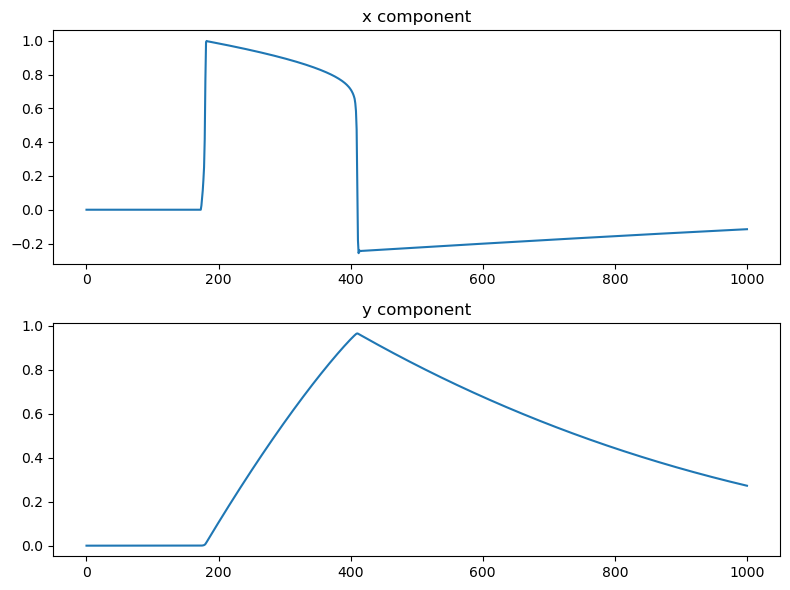

In [10]:
X = np.load("dataset/test1/test1_0.npz")['data']
print(np.shape(X))

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))

i=5
ax1.plot(np.arange(0,np.shape(X)[1],1), X[0, :, 4, 4, 0])
ax1.set_title('x component')

ax2.plot(np.arange(0,np.shape(X)[1],1), X[0, :, 4, 4, 1])
ax2.set_title('y component')

plt.tight_layout()
plt.show()

## Generate Dataset for Van Der Pol

In [12]:
from scripts.datagen.vanderpol import VanDerPol
import matplotlib.pyplot as plt
from scripts.utils.params import *
from scripts.utils.utils import *
from scripts.particle.thetamethod import ThetaMethod 

s_params = SolverParams.get_from_file('scripts/utils/parameters_files/parameters_VDP.txt')
s_params.print_params()

Solver =  thetamethod
T =  25.0
dt =  0.1
u0 =  [1.0, 1.0]
Theta:  0.5
Tolerance:  0.01


In [13]:
create_dataset(
    dataset_name="VDP_testset", 
    num_samples=10, 
    num_processes=5, 
    model_name='Van Der Pol',
    solver_params=s_params,
    model_params=1.0, 
    generate=True, 
    remove_samples=True)

Program finished in 7.206879499994102 seconds


(251, 2)


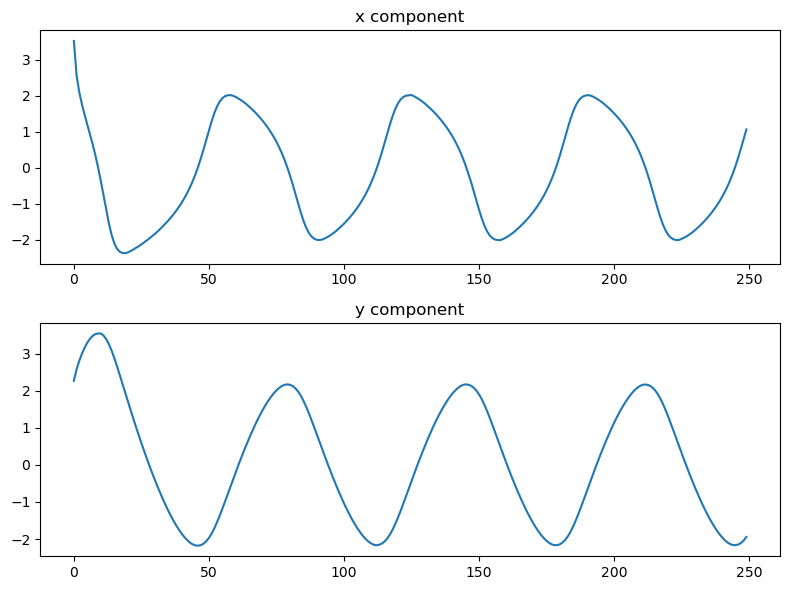

In [14]:
sample = 20
X = np.load("dataset/VDP/VDP_0.npz")['data'][sample]
print(np.shape(X))

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))

i=250
ax1.plot(np.arange(0,i,1), X[:i,0])
# ax1.plot(np.arange(0,np.shape(X)[0],1), X[:,0])
ax1.set_title('x component')

ax2.plot(np.arange(0,i,1), X[:i,1])
# ax2.plot(np.arange(0,np.shape(X)[0],1), X[:50, 1])
ax2.set_title('y component')

plt.tight_layout()
plt.show()

Test lstm for VDP

In [2]:
from scripts.NeuralNetwork.rnn import RNN
from scripts.NeuralNetwork.autoencoder import Autoencoder
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = 'dataset/VDP/VDP_0.npz'
data = np.load(file_path)['data']
print(np.shape(data))

(200, 251, 2)


In [7]:
ae = Autoencoder(latent_dim=250)
ae.get_data(file_path,compressed_name='data')
ae.build_model(input_shape=(251,2),summary=True)

  0%|          | 0/200 [00:00<?, ?it/s]

ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 251, 2)

In [4]:
r = RNN(window_size=50,model_name='rnn_2_VDP')
r.load_model(model_name='rnn_2_VDP')

sample=0
test = np.load('./dataset/VDP_testset/VDP_testset_0.npz')['data'][sample]

In [5]:
forecast = r.predict_future(test[:r.window_size],250-r.window_size)
forecast_full = np.concatenate((test[:r.window_size], forecast), axis=0)

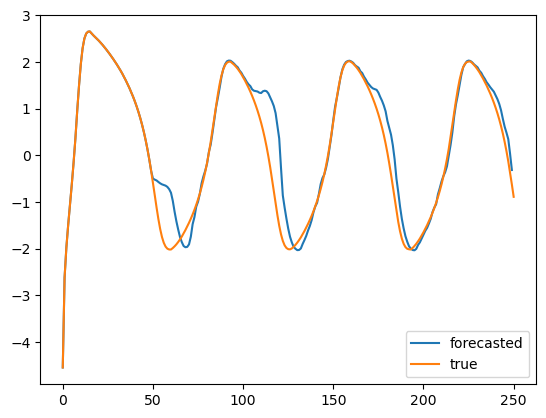

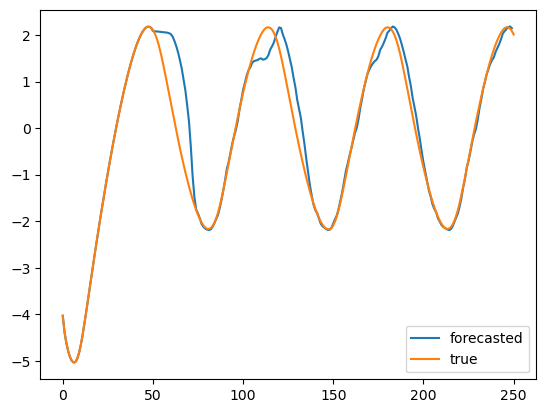

In [8]:
for i in range(2):
    plt.plot(forecast_full[:, i])
    plt.plot(test[:, i])
    plt.legend(['forecasted','true'])
    # plt.vlines(r.window_size, ymin=np.min(test[:,i]),ymax=np.max(test[:,i]), colors='red')
    plt.show()